In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [212]:
import pylunar
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import NullFormatter

In [2]:
from IPython.display import HTML
import numpy
import re
import time

from scipy import *
from scipy.constants import e, h, hbar

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
def spines(ax=None):
    if ax is None:
        ax = plt.gca()
    dict(ax.spines.items())["left"].set_position(('outward', 10))
    dict(ax.spines.items())["bottom"].set_position(('outward', 10))
    dict(ax.spines.items())["top"].set_position(('outward', 10))
    dict(ax.spines.items())["right"].set_position(('outward', 10))
    
def annotate_distance(ax, text, point1, point2, linestyle, fontsize, textoffset = (0.1,0)):
    ax.annotate('', point1, point2, \
            arrowprops={'arrowstyle':'<->', 'linestyle':linestyle, "facecolor":"black"}, fontsize=fontsize);
    ax.annotate(text, point1, (0.5*(point1[0]+point2[0])+textoffset[0], 0.5*(point1[1]+point2[1])+textoffset[1]),
                fontsize=fontsize)

# Data extraction

In [112]:
filename = 'manual.txt'

In [113]:
with open(filename, 'r') as f:
    cases = f.readlines()

In [114]:
cases[0].split()

['2021', '10', '07', '22', '41', '35.60N', '140.10E', '080k', '6.1', '494']

In [117]:
time = []
mag = []
for i in cases:
    time.append(datetime.datetime(int((i.split())[0]), int((i.split())[1]), int((i.split())[2]), int((i.split())[3]), int((i.split())[4]), 0, 0))
    mag.append(float((i.split())[8]))

# Moon Phase

In [119]:
phase = []

for i in time:
    mi.update(i)
    phase.append(round(float(mi.fractional_phase()), 3))

# Plotting

In [120]:
#plt.rcParams["text.usetex"] =True

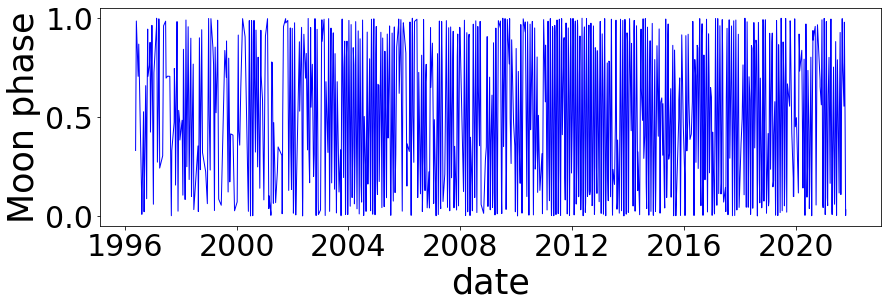

In [126]:
fig, axes = plt.subplots(1,1,figsize=(14, 4))

p = axes.plot(time, phase, 'b', linewidth=1.0)

axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'Moon phase', fontsize=35)

axes.tick_params(axis='x', labelsize=30)
axes.tick_params(axis='y', labelsize=30)

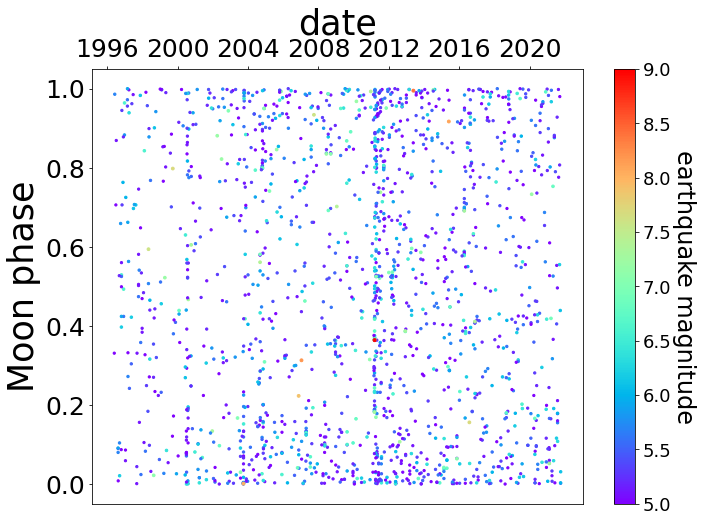

In [236]:
fig, axes = plt.subplots(1,1,figsize=(11, 8))

p = plt.scatter(time, phase, s = mag, c  = mag, cmap='rainbow')

axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'Moon phase', fontsize=35)

axes.tick_params(axis='x', labelsize=25)
axes.tick_params(axis='y', labelsize=25)
axes.xaxis.tick_top()  
axes.xaxis.set_label_position('top') 

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'earthquake magnitude', labelpad=25, rotation=270, fontsize=24)
cb.ax.tick_params(labelsize=18) 


# Looking for correlations

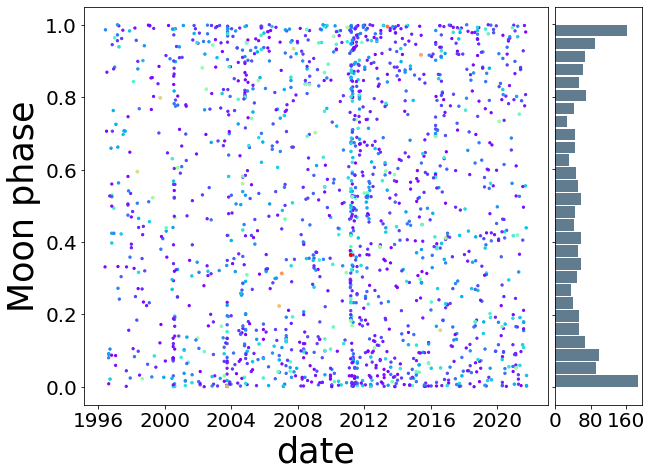

In [227]:
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:12, 0:10])
ax_hist_x = fig.add_subplot(gs[1:12, 10:12])

ax_scatter.scatter(time, phase, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'Moon phase', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)

ax_hist_x.hist(phase, orientation = 'horizontal', bins=28, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()